In [3]:
# 🧠 Цей блок коду завантажує датасет MNIST

import tensorflow as tf


# Завантаження набору зображень рукописних цифр
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Виведення розмірів вибірок | Скільки картинок є | розмір (28×28 пікселів) | Скільки відповідних міток (яка відповідь правильна)
print(f"Train images shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Train images shape: (60000, 28, 28), Train labels shape: (60000,)
Test images shape: (10000, 28, 28), Test labels shape: (10000,)


In [4]:
# 🧠 Цей блок коду готує зображення з цифрами від 2 до 9

import numpy as np

# Завантаження MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Фільтрація цифр від 2 до 9
mask_train = (y_train >= 2) & (y_train <= 9)
mask_test = (y_test >= 2) & (y_test <= 9)


# фільтрація датасету, щоб залишити тільки потрібні цифри (2–9)
x_train_filtered, y_train_filtered = x_train[mask_train], y_train[mask_train]
x_test_filtered, y_test_filtered = x_test[mask_test], y_test[mask_test]

print(f"Відфільтровані тренувальні зображення: {x_train_filtered.shape}")
print(f"Відфільтровані тестові зображення: {x_test_filtered.shape}")


# Нормалізація піксельних значень, прибирання градієнту (переведення діапазону значень [0, 255] у [0, 1])
x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0


# змінює форму з (кількість, 28, 28) на (кількість, 28, 28, 1), де один це один колір
x_train_filtered = np.expand_dims(x_train_filtered, axis=-1)  # (кількість, 28, 28, 1)
x_test_filtered = np.expand_dims(x_test_filtered, axis=-1)

print(f"Форма після розширення: {x_train_filtered.shape}, {x_test_filtered.shape}")


Відфільтровані тренувальні зображення: (47335, 28, 28)
Відфільтровані тестові зображення: (7885, 28, 28)
Форма після розширення: (47335, 28, 28, 1), (7885, 28, 28, 1)


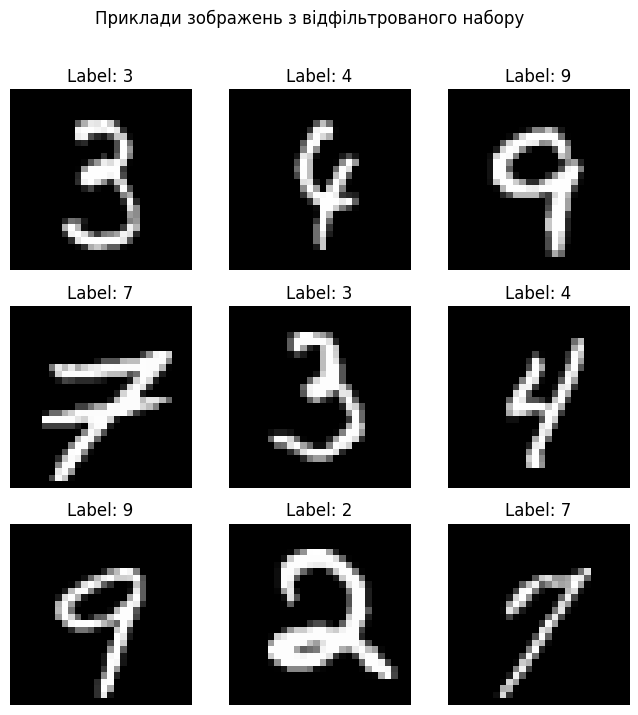

In [5]:
# 🧠 9 випадкових зображень цифр із відфільтрованого набору

import matplotlib.pyplot as plt
import numpy as np

# Випадковий вибір зображень
num_images = 9  # Кількість зображень для показу
indices = np.random.randint(0, x_train_filtered.shape[0], num_images)  # Випадкові індекси


# Побудова 3x3 сітки зображень
plt.figure(figsize=(8, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)  # 3x3 сітка
    plt.imshow(x_train_filtered[idx].reshape(28, 28), cmap='gray')  # Показ зображення
    plt.title(f"Label: {y_train_filtered[idx]}") # Назва з міткою
    plt.axis('off')  # Ховає осі координат

plt.suptitle("Приклади зображень з відфільтрованого набору")
plt.show()

In [6]:
# 🧠 Готування датасету MNIST (цифри) до навчання нейронної мережі

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Завантаження даних датасету
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Фільтрація, тільки цифри 2 - 9
mask_train = (y_train >= 2) & (y_train <= 9)
mask_test = (y_test >= 2) & (y_test <= 9)

x_train_filtered, y_train_filtered = x_train[mask_train], y_train[mask_train]
x_test_filtered, y_test_filtered = x_test[mask_test], y_test[mask_test]

print(f"Відфільтровані тренувальні зображення: {x_train_filtered.shape}")
print(f"Відфільтровані тестові зображення: {x_test_filtered.shape}")


# Нормалізація даних (переведення діапазону значень [0, 255] у [0, 1])
x_train_filtered = x_train_filtered.astype('float32') / 255.0
x_test_filtered = x_test_filtered.astype('float32') / 255.0

# Зміна форми для підготовки до навчання (додавання осі каналів)
x_train_filtered = np.expand_dims(x_train_filtered, axis=-1)
x_test_filtered = np.expand_dims(x_test_filtered, axis=-1)

print(f"Форма після розширення: {x_train_filtered.shape}, {x_test_filtered.shape}")


# Коригування міток для відповідності діапазону [0, 7]
y_train_filtered = y_train_filtered - 2
y_test_filtered = y_test_filtered - 2


# Перетворення міток у формат one-hot encoding для нейронної мережі
y_train_filtered = to_categorical(y_train_filtered, num_classes=8)
y_test_filtered = to_categorical(y_test_filtered, num_classes=8)

print(f"Форма міток після перетворення: {y_train_filtered.shape}, {y_test_filtered.shape}")

Відфільтровані тренувальні зображення: (47335, 28, 28)
Відфільтровані тестові зображення: (7885, 28, 28)
Форма після розширення: (47335, 28, 28, 1), (7885, 28, 28, 1)
Форма міток після перетворення: (47335, 8), (7885, 8)


In [7]:
# 🧠 Імпорти для: побудови архітектури моделі, додавання шарів, створення моделі

import tensorflow as tf
from tensorflow.keras import layers, models

In [8]:
# 🧠 Створеняя та виводження архітектури нейронної мережі :3 

def create_cnn_model():
    # Модель створюється як послідовність шарів
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),  # Задання форми вхідного зображення
        
        # Перший згортковий шар, 32 фільтри розміром 3x3, активація ReLU.
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Другий згортковий шар, 64 фільтри, ще один пулінг
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Третій згортковий шар, ще 64 фільтри, без пулінгу
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Перетворення у вектор
        layers.Flatten(),

        # Повнозв’язний шар
        layers.Dense(64, activation='relu'),
        layers.Dense(8, activation='softmax')  # 8 класів (цифри 2-9)
    ])
    return model

# Створення моделі
model = create_cnn_model()

# Виведення архітектури моделі
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,192 (364.03 KB)

 Trainable params: 93,192 (364.03 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 🧠 Налаштування (компілювання) моделі перед її навчанням

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# 🧠 Навчання моделі
history = model.fit(x_train_filtered, y_train_filtered, epochs=10, 
                    validation_data=(x_test_filtered, y_test_filtered))


Epoch 1/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8860 - loss: 0.3565 - val_accuracy: 0.9834 - val_loss: 0.0474
Epoch 2/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9851 - loss: 0.0488 - val_accuracy: 0.9874 - val_loss: 0.0364
Epoch 3/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9897 - val_loss: 0.0310
Epoch 4/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.9885 - val_loss: 0.0338
Epoch 5/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9902 - val_loss: 0.0299
Epoch 6/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9951 - loss: 0.0141 - val_accuracy: 0.9911 - val_loss: 0.0294
Epoch 7/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9920 - val_loss: 0.0243
Epoch 8/10
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9957 -

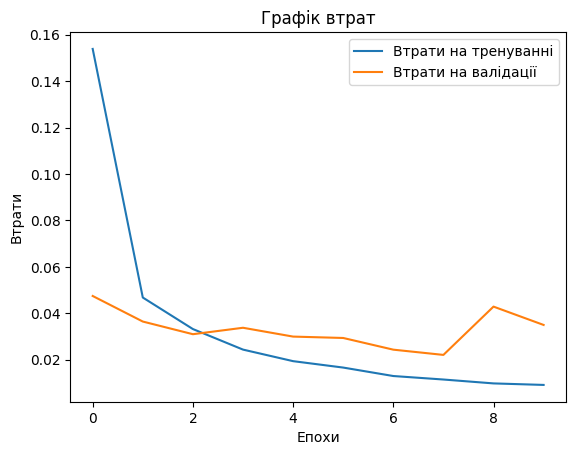

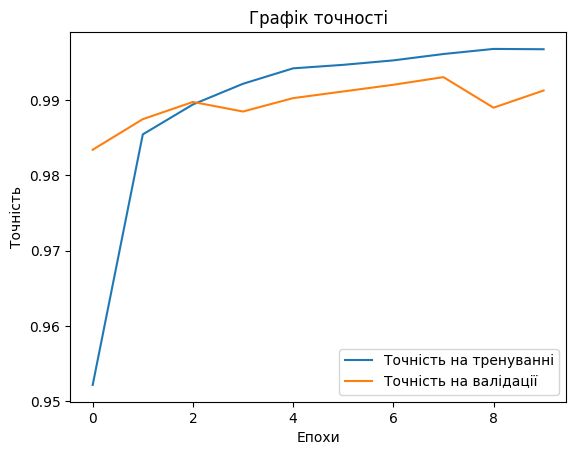

In [11]:
# 🧠 візуалізація процессу навчання нейронної мережі

import matplotlib.pyplot as plt

# Побудова графіка втрат (loss)
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.title('Графік втрат')
plt.show()

# Побудова графіка точності (accuracy)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.title('Графік точності')
plt.show()


In [12]:
# 🧠 Зберігання навчену нейронну мережу model у файл speed_limit_model.keras

model.save('speed_limit_model.keras')
print("Модель успішно збережена у форматі .keras")


Модель успішно збережена у форматі .keras


In [13]:
# 🧠 Завантаження раніше збереженої моделі

from tensorflow.keras.models import load_model

# Завантаження збереженої моделі
loaded_model = load_model('speed_limit_model.keras')
print("Модель успішно завантажена.")


Модель успішно завантажена.


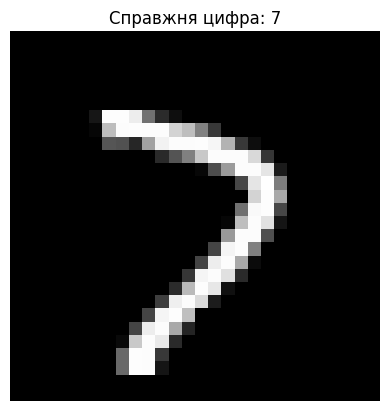

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Розпізнано цифру: 7


In [14]:
# 🧠 Тест розпізнавання рандомної цифри

import numpy as np
import matplotlib.pyplot as plt

# Випадковий індекс із тестового набору
random_idx = np.random.randint(0, x_test_filtered.shape[0])

# Вибір зображення та справжньої мітки
random_image = x_test_filtered[random_idx]
true_label = np.argmax(y_test_filtered[random_idx]) + 2

# Виведення зображення
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"Справжня цифра: {true_label}")
plt.axis('off')
plt.show()

# Розширення розмірності для подачі в модель (batch_size = 1)
image_for_prediction = np.expand_dims(random_image, axis=0)

# Прогноз. Результат розпізнавання
prediction = loaded_model.predict(image_for_prediction)
predicted_label = np.argmax(prediction) + 2

print(f"Розпізнано цифру: {predicted_label}")


In [15]:
# 🧠 Перестворення 1050 зображень
# якщо цифри перетворились на сірі квадрати

import os
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

# Завантаження MNIST
(x_train, y_train), _ = mnist.load_data()

# Фільтрація цифр від 2 до 9, хз навіщо вже втретє, але зайвим не буде
mask = (y_train >= 2) & (y_train <= 9)
x_filtered = x_train[mask]
y_filtered = y_train[mask]

# Перевірка кількості
total_needed = 1050
if len(x_filtered) < total_needed:
    raise ValueError("Недостатньо зображень цифр від 2 до 9 у MNIST!")

# Випадкові індекси без повторів
np.random.seed(42)
indices = np.random.choice(len(x_filtered), total_needed, replace=False)

# Створення папки signs
os.makedirs("signs", exist_ok=True)

# Збереження зображень
for i, idx in enumerate(indices, start=1):
    image = x_filtered[idx]  # (28, 28), dtype=uint8, значення від 0 до 255
    path = f"signs/speed_sign_{i}.png"
    cv2.imwrite(path, image)

print(f"✅ Збережено {total_needed} зображень у папку 'signs'")



✅ Збережено 1050 зображень у папку 'signs'


In [ ]:
#  🧠🧠🧠 Готова лабораторна номер 444 🧠🧠🧠


# === ІМПОРТИ ТА ІНІЦІАЛІЗАЦІЯ ===
import os, cv2, random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from collections import deque
from IPython.display import display, Markdown


# === ЗАГРУЗКА МОДЕЛІ ТА ІНІЦІАЛІЗАЦІЯ ПАПОК ===
#from tensorflow.keras.models import load_model
model = load_model('speed_limit_model.keras')
print("Модель обмеження швидкості успішно завантажена.")


# Перевірка наявності папки зі знаками
if not os.path.exists('signs'):
    os.makedirs('signs')

road_signs = {}
# Глобальна змінна для збереження останнього використаного знака
last_sign_image = None

#result = move_agent_with_knowledge(G, kb, test_start, test_end, max_steps=100)
#print(f"Кількість повернутих значень: {len(result)}")





# 🧩🧩🧩🧩 РОБОТА З ГРАФОМ 🧩🧩🧩🧩


def generate_graph(width, height):
    """Створення сіткового графа з обмеженнями швидкості."""
    G = nx.Graph()
    speed_limits = {}

    for i in range(width):
        for j in range(height):
            G.add_node((i, j))  # Додавання вузла на координати (i, j)

            # Додавання ребра ліворуч (якщо не на першому стовпчику)
            if i > 0:
                G.add_edge((i, j), (i - 1, j))
                speed_limits[((i, j), (i - 1, j))] = random.choice(range(20, 100, 10))  # Призначення випадкової швидкості

            # Додавання ребра згори (якщо не в першому рядку)
            if j > 0:
                G.add_edge((i, j), (i, j - 1))
                speed_limits[((i, j), (i, j - 1))] = random.choice(range(20, 100, 10))  # Призначення випадкової швидкості

    return G, speed_limits  # Повернення графа та словника швидкостей





def remove_random_edges(G, remove_count):
    """Видалення випадкових ребер із перевіркою на зв'язність."""
    edges = list(G.edges())  # Отримання списку всіх ребер
    max_removable_edges = len(edges)

    # Обмеження кількості видаляємих ребер, якщо задане число перевищує доступне
    if remove_count > max_removable_edges:
        remove_count = max_removable_edges

    # Випадковий вибір ребер для видалення
    removed_edges = random.sample(edges, remove_count)
    
    for edge in removed_edges:
        G.remove_edge(*edge)  # Видалення ребра

        # Перевірка на збереження зв'язності
        if not nx.is_connected(G):
            G.add_edge(*edge)  # Відновлення ребра, якщо граф розірвався
            
    return G  # Повернення оновленого графа


    




# 📷📷📷📷 Генерація та розпізнавання знаків 📷📷📷📷


def generate_speed_limit_signs(G):
    """Генерація унікальних знаків обмеження швидкості для кожного напрямку ребра в графі."""
    global road_signs
    os.makedirs('signs', exist_ok=True)
    road_signs = {}

    all_edges = list(G.edges())
    num_edges = len(all_edges)

    # Перевірка на перевищення максимальної кількості напрямків (100)
    if num_edges * 2 > 100:
        raise ValueError("⚠ Занадто багато напрямків: перевищено 100. Збільш ліміт або зменш граф.")

    # Створення списку унікальних індексів для назв файлів
    unique_indices = list(range(1, 101))
    random.shuffle(unique_indices)
    index_iter = iter(unique_indices)

    for edge in all_edges:
        node1, node2 = edge

        # Генерація знаків для обох напрямків
        for direction in [(node1, node2), (node2, node1)]:
            idx = next(index_iter)
            sign_path = f'signs/speed_sign_{idx}.png'

            # Генерація зображення тільки якщо воно ще не існує
            """if not os.path.exists(sign_path):
                digit = random.randint(2, 9)
                pixel_value = digit * 25
                sign_image = np.full((28, 28), pixel_value, dtype=np.uint8)
                cv2.imwrite(sign_path, sign_image)
                print(f"🖼 Збережено нове зображення: {sign_path}") 
            else:
                print(f"🛑 Пропущено перезапис: {sign_path}") """

            # Прив'язка шляху зображення до напрямку
            road_signs[direction] = sign_path

    print(f"✅ Створено {len(road_signs)} знаків (або прив'язок) для напрямків ребер.")
    print("🎉 Генерація знаків завершена!")





def check_signs_directory():
    """Перевірка вмісту папки 'signs' та генерація знаків за потреби."""
    sign_files = os.listdir('signs')

    # Якщо папка порожня — виконується генерація знаків
    if not sign_files:
        print("⚠ Папка 'signs' порожня!")
        generate_speed_limit_signs()
    else:
        # Виведення кількості знайдених файлів
        print(f"✅ У папці 'signs' знайдено {len(sign_files)} файлів.")

check_signs_directory()





def recognize_speed_limit(sign_image_path, model):
    """Розпізнавання знака швидкості за допомогою моделі нейронної мережі."""

    # Перевірка існування файлу
    if not os.path.exists(sign_image_path):
        print(f"⚠ Файл {sign_image_path} не знайдено. Використовується значення за замовчуванням.")
        return 50  # Значення за замовчуванням

    # Завантаження зображення в градаціях сірого
    image = cv2.imread(sign_image_path, cv2.IMREAD_GRAYSCALE)
    if image is None or image.size == 0:
        print(f"⚠ Помилка зчитування {sign_image_path}. Використовується значення за замовчуванням.")
        return 50  # Значення за замовчуванням

    # Підготовка зображення до передбачення
    image = cv2.resize(image, (28, 28))               # Зміна розміру
    image = image.astype('float32') / 255.0           # Нормалізація значень
    image = np.expand_dims(image, axis=(0, -1))       # Додавання розмірностей

    # Передбачення цифри на знаку
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction) + 2       # Цифри від 2 до 9
    speed_limit = predicted_label * 10                # Переведення в км/год

    print(f"🏁 Розпізнано знак {predicted_label}, обмеження: {speed_limit} км/год")
    return speed_limit




"""
def predict_speed_limit(node1, node2, model):
    \"\"\"Передбачення обмеження швидкості між вузлами за зображенням знака.\"\"\"

    # Перевірка на стартову позицію без попереднього вузла
    if node1 is None or node2 is None:
        return 50  # Значення за замовчуванням

    # Формування ключа ребра у фіксованому порядку
    edge_key = tuple(sorted([node1, node2]))
    image_path = f'signs/speed_sign_{amogus_1.png'

    # Перевірка наявності зображення
    if not os.path.exists(image_path):
        print(f"⚠ Файл {image_path} не знайдено. Використовується значення за замовчуванням.")
        return 50

    # Завантаження зображення в градаціях сірого
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None or image.size == 0:
        print(f"⚠ Неможливо зчитати зображення {image_path}. Використовується значення за замовчуванням.")
        return 50

    # Підготовка зображення
    image = cv2.resize(image, (28, 28))            # Зміна розміру
    image = cv2.bitwise_not(image)                 # Інверсія кольорів
    image = image / 255.0                          # Нормалізація
    image = np.expand_dims(image, axis=(0, -1))    # Додавання осей

    # Класифікація та обчислення швидкості
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)        # Значення в діапазоні 0–7
    speed = predicted_label * 10                   # Швидкість (20–90 км/год)

    return speed
"""




# 👀👀👀👀 База знань агента 👀👀👀👀

class KnowledgeBase:
    """База знань агента для зберігання інформації про граф-дорогу."""

    def __init__(self):
        self.visited_nodes = set()       # Вузли, які агент уже відвідав
        self.known_edges = set()         # Відомі дороги (ребра) між вузлами
        self.road_signs = {}             # Дорожні знаки для напрямків (звідки → куди)

    def tell_visited(self, node):
        """Додавання відвіданого вузла."""
        self.visited_nodes.add(node)
        print(f"TELL: Вузол {node} додано до відвіданих.")

    def tell_edge(self, node1, node2):
        """Додавання відомого ребра (дороги)."""
        self.known_edges.add((node1, node2))
        self.known_edges.add((node2, node1))  # Обидва напрямки
        print(f"TELL: Дорога {node1} <-> {node2} додана в базу знань.")

    def tell_sign(self, from_node, to_node, sign_info):
        """Збереження дорожнього знака для напрямку."""
        if from_node not in self.road_signs:
            self.road_signs[from_node] = {}
        self.road_signs[from_node][to_node] = sign_info
        print(f"TELL: Дорожній знак {from_node} -> {to_node}: {sign_info} додано.")

    def ask_visited(self, node):
        """Перевірка, чи вузол уже відвідано."""
        return node in self.visited_nodes

    def ask_possible_moves(self, node):
        """Отримання доступних напрямків руху з вузла."""
        return self.road_signs.get(node, {})

    def ask_known_edges(self):
        """Отримання всіх відомих доріг."""
        return self.known_edges


# Ініціалізація бази знань
kb = KnowledgeBase()
print("\n--- База знань агента ---")
print(f"Відвідані вузли: {kb.visited_nodes}")
print(f"Відомі дороги: {kb.known_edges}")
print(f"Дорожні знаки: {kb.road_signs}")
print("--------------------------\n")

# Повторне завантаження моделі (якщо потрібно в контексті коду)
model = load_model('speed_limit_model.keras')
print("Модель обмеження швидкості успішно завантажена.")





    
# 👁👁👁👁 Візуалізація руху 👁👁👁👁


def draw_graph(G, agent_pos, visited, path, seen, speed_limits, start, end, previous_pos=None, current_sign_path=None, edge_speeds=None):
    """Візуалізація графа з кольоровим виділенням вузлів і відображенням знака швидкості."""
    global last_sign_image  # Збереження останнього показаного зображення

    # Побудова позицій вузлів для графіка
    pos = {(x, y): (x, -y) for x, y in G.nodes()}

    node_colors = []
    for node in G.nodes():
        if node == agent_pos:
            node_colors.append("red")  # Поточна позиція агента
        elif node == end:
            node_colors.append("green")  # Кінцева точка
        elif node in path:
            node_colors.append("lightgreen")  # Пройдений шлях
        elif node in seen:
            node_colors.append("yellow")  # Переглянуті, але не відвідані
        elif node not in visited:
            node_colors.append("blue")  # Не відвідані і не переглянуті
        else:
            node_colors.append("white")  # Відвідані

    plt.figure(figsize=(12, 6))

    # Візуалізація графа
    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_size=400, node_color=node_colors, edge_color="black")

    # Додавання текстових підписів швидкості на ребрах
    if edge_speeds:
        edge_labels = {(min(edge), max(edge)): f"{speed} км/год" for edge, speed in edge_speeds.items()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(f"Агент знаходиться у {agent_pos}")

    # Підготовка до відображення зображення знака
    sign_image_path = current_sign_path

    # Спроба показати поточний знак
    if current_sign_path and os.path.exists(current_sign_path):
        last_sign_image = current_sign_path
        print(f"Завантаження зображення: {current_sign_path}")
        try:
            sign_image = cv2.imread(current_sign_path, cv2.IMREAD_GRAYSCALE)
            if sign_image is not None and sign_image.size > 0:
                last_sign_image = current_sign_path  # Збереження останнього використаного знака
                sign_image = cv2.bitwise_not(sign_image)  # Інверсія для кращого контрасту
                sign_image = cv2.resize(sign_image, (100, 100), interpolation=cv2.INTER_AREA)

                # Показ зображення
                plt.subplot(1, 2, 2)
                plt.imshow(sign_image, cmap='gray', vmin=0, vmax=255)
                plt.axis('off')
                plt.title(f"Знак швидкості для {agent_pos}")
            else:
                print(f"⚠ Зображення порожнє або не знайдено: {current_sign_path}")
        except Exception as e:
            print(f"❌ Помилка обробки зображення {current_sign_path}: {e}")

    # Якщо поточного знака немає — показ останнього
    elif last_sign_image and os.path.exists(last_sign_image):
        print(f"Використання попереднього знака: {last_sign_image}")
        try:
            sign_image = cv2.imread(last_sign_image, cv2.IMREAD_GRAYSCALE)
            if sign_image is not None and sign_image.size > 0:
                sign_image = cv2.bitwise_not(sign_image)
                sign_image = cv2.resize(sign_image, (100, 100), interpolation=cv2.INTER_AREA)

                plt.subplot(1, 2, 2)
                plt.imshow(sign_image, cmap='gray', vmin=0, vmax=255)
                plt.axis('off')
                plt.title("Останній використаний знак")
            else:
                print(f"⚠ Зображення порожнє або не знайдено: {last_sign_image}")
        except Exception as e:
            print(f"❌ Помилка обробки зображення {last_sign_image}: {e}")
    else:
        print("⚠ Немає доступного зображення для відображення.")

    plt.show()






# 🕹🕹🕹🕹 Логіка руху агента 🕹🕹🕹🕹



def move_agent_with_knowledge(G, kb, start, end, max_steps=50):
    """Функція для руху агента з використанням бази знань та контролю швидкості."""

    # Ініціалізація змінних
    visited = set()
    path = []
    seen = deque()  # Двостороння черга для збереження бачених вузлів
    avoid_nodes = set()  # Набір вузлів, яких потрібно уникати
    current_pos = start
    previous_pos = None
    direction = "right"
    step_count = 0
    in_dead_end = False
    visited_nodes_counter = {}
    skip_speed_check = False

    # Словник для збереження обмежень швидкості за дорогами (зв’язками)
    speed_limits = {}

    def get_speed_limit(node1, node2):
        """Функція для отримання швидкості для певної дороги."""
        edge_key = (previous_pos, current_pos)
        if edge_key not in speed_limits:
            speed_limits[edge_key] = random.choice(range(20, 100, 10))  # Випадкова швидкість
        return speed_limits[edge_key]


     # --- Основний цикл руху ---
    while current_pos != end and step_count < max_steps:
        # Оновлення стану агента
        visited.add(current_pos)
        path.append(current_pos)
        kb.tell_visited(current_pos)  # Додавання поточного вузла до бази знань
        print(f"📥 База знань оновлена: додано інформацію про вузол {current_pos}")
        step_count += 1

        # Аналіз сусідніх вузлів
        neighbors = list(G.neighbors(current_pos))
        print(f"🔍 Сканування сусідніх перехресть для вузла {current_pos}: {neighbors}")

        for neighbor in neighbors:
            kb.tell_edge(current_pos, neighbor)
            direction_sign = get_direction(current_pos, neighbor)
            kb.tell_sign(current_pos, neighbor, direction_sign)
            print(f"🚸 Дорожній знак: з {current_pos} у {neighbor} -> {direction_sign}")

            # Перевірка на тупики: якщо є лише один шлях назад, уникаємо
            if len(list(G.neighbors(neighbor))) == 1 and neighbor != end:
                avoid_nodes.add(neighbor)
                print(f"⚠ Виявлено тупиковий вузол: {neighbor}, він буде уникатись.")


            # Додавання вузла до бачених
            if neighbor not in visited and neighbor not in seen:
                seen.append(neighbor)
                print(f"👀 Додано до бачених вузлів: {neighbor}")

        # Видалення поточної позиції з черги бачених
        if current_pos in seen:
            seen.remove(current_pos)

        from IPython.display import display, Markdown
        
        # --- Візуальний опис кроку ---
        step_info = f"🚗 Крок {step_count}: Агент рухається до {current_pos}"
        display(Markdown(f"<span style='font-size:20px; font-weight:bold'>{step_info}</span>"))

        print(f"🧭 Поточний напрямок: {direction}")

        # --- 
        if previous_pos is not None:
            edge_key = (previous_pos, current_pos)
            current_sign_path = road_signs.get(edge_key, f'signs/speed_sign_0.png')
            
            #draw_graph(G, current_pos, visited, path, seen, speed_limits, start, end, previous_pos, current_sign_path)


            

        # Отримання обмеження швидкості для дороги
        if previous_pos is not None and not skip_speed_check:
            edge_key = (previous_pos, current_pos)
            sign_image_path = road_signs.get(edge_key)
            if sign_image_path is None:
                print(f"⚠ Немає зображення для ребра {edge_key}, використовую заглушку.")
                sign_image_path = 'signs/speed_sign_0.png'
        
            speed_limit = recognize_speed_limit(sign_image_path, model)
            speed_limits[edge_key] = speed_limit
            print(f"🚦 Обмеження швидкості для дороги {previous_pos} -> {current_pos}: {speed_limit} км/год")
        else:
            speed_limit = 50
            sign_image_path = 'signs/speed_sign_0.png'  # 🛠 ДОБАВЛЕНО: дефолтне зображення

  
        #sign_image_path = None 
    
        # Відображення графа з доданим зображенням знака
        pass            
        current_sign_path = sign_image_path  


            

        # Виявлення тупиків і циклів
        visited_nodes_counter[current_pos] = visited_nodes_counter.get(current_pos, 0) + 1
        if visited_nodes_counter[current_pos] > 2:
            in_dead_end = True
            print(f"🔄 ЦИКЛ ВИЯВЛЕНО! ВХІД У СТАН ТУПИКА на вузлі {current_pos}")

        # Уникнення тупиків та рух до бачених вузлів
        if (len(neighbors) == 1 and previous_pos in neighbors) or in_dead_end:
            in_dead_end = True
            if seen:
                target_seen = next((node for node in reversed(seen) if node not in avoid_nodes), None)
                print(f"↩ ТУПИК! Агент прямує покроково до жовтої точки {target_seen}")

                if target_seen:
                    try:
                        shortest_path = nx.shortest_path(G, current_pos, target_seen)
                        next_pos = shortest_path[1]

                        # 🧠 ОНОВЛЕННЯ СТАНУ
                        new_direction = get_direction(current_pos, next_pos)
                        direction = new_direction
                        previous_pos = current_pos

                        
                        current_pos = next_pos

                        # 🧩 ВІЗУАЛІЗАЦІЯ ПЕРЕД ПРОДОВЖЕННЯМ
                        # Визначення знаку
                        edge_key = (previous_pos, current_pos)
                        #sign_image_path = road_signs.get(edge_key, 'signs/speed_sign_0.png')
                        current_sign_path = sign_image_path
                        
                        # Додавання до графа (якщо потрібно — оновити швидкість)
                        """if edge_key not in speed_limits:
                            speed_limit = recognize_speed_limit(sign_image_path, model)
                            speed_limits[edge_key] = speed_limit"""
                        
                        draw_graph(G, current_pos, visited, path, seen, speed_limits, start, end, previous_pos, current_sign_path)
                        
                        continue 
                    except nx.NetworkXNoPath:
                        print("❌ Немає шляху до жовтої точки, завершення руху.")
                        break
                else:
                    print("❌ Немає жовтих точок для повернення, завершення руху.")
                    break
        else:
            new_moves, old_moves = analyze_moves(G, current_pos, visited)
            possible_moves = [node for node in new_moves + old_moves if node not in avoid_nodes]

            # Якщо кінцева точка є серед бачених, рух покроковий
        if end in seen:
            print(f"🎯 Кінцева точка {end} була переглянута, рухаємося покроково!")
            shortest_path = nx.shortest_path(G, current_pos, end)
            next_pos = shortest_path[1]
        else:
            next_pos = min(possible_moves, key=lambda pos: abs(pos[0] - end[0]) + abs(pos[1] - end[1]))





        # Оновлення напрямку руху
        new_direction = get_direction(current_pos, next_pos)
        if new_direction != direction:
            if (direction, new_direction) in [("up", "right"), ("right", "down"), ("down", "left"), ("left", "up")]:
                print("➡ Поворот направо")
            elif (direction, new_direction) in [("up", "left"), ("left", "down"), ("down", "right"), ("right", "up")]:
                print("⬅ Поворот наліво")
            else:
            
                print("🔄 Розворот на 180 градусів")



        # Спочатку виклик відображення графа з правильним значенням знака
        if previous_pos is not None and not skip_speed_check:
            edge_key = (previous_pos, current_pos)
            if edge_key in road_signs:
                sign_image_path = road_signs.get(edge_key)
            else:
                print(f"⚠ Немає зображення для ребра {edge_key}, використовую заглушку.")
                sign_image_path = 'signs/speed_sign_0.png'
        else:
            sign_image_path = f'signs/speed_sign_0.png'

        current_sign_path = sign_image_path
            
        draw_graph(G, current_pos, visited, path, seen, speed_limits, start, end, previous_pos, current_sign_path)


        

        direction = new_direction
        previous_pos = current_pos
        current_pos = next_pos
        skip_speed_check = False






    # Кінцева точка, якщо досягли
    if current_pos == end:
        kb.tell_visited(current_pos)
        path.append(current_pos)
        visited.add(current_pos)
        print(f"🏁 Досягнуто кінцевої точки! Додана {current_pos} до visited_nodes.")

        # Фінальна візуалізацію
        edge_key = (previous_pos, current_pos)
        sign_image_path = road_signs.get(edge_key, 'signs/speed_sign_0.png')
        current_sign_path = sign_image_path
    
        draw_graph(G, current_pos, visited, path, seen, speed_limits, start=end, end=end, previous_pos=previous_pos, current_sign_path=current_sign_path)



    print("✅ Рух завершено!")
    print(f"📊 Фактична кількість кроків агента: {step_count}")

    return visited, path, seen, speed_limits, step_count









    
# 🧩🧩🧩🧩 Допоміжні функції 🧩🧩🧩🧩


def get_direction(from_pos, to_pos):
    """Визначення напрямку руху агента."""
    dx, dy = to_pos[0] - from_pos[0], to_pos[1] - from_pos[1]
    if dx == 1: return "right"
    if dx == -1: return "left"
    if dy == -1: return "up"
    if dy == 1: return "down"
    return None


def analyze_moves(G, current_pos, visited):
    """Аналіз можливих рухів агента."""
    neighbors = list(G.neighbors(current_pos))
    new_moves = [node for node in neighbors if node not in visited]
    old_moves = [node for node in neighbors if node in visited]
    return new_moves, old_moves


def print_knowledge_base(kb):
    """Вивід поточного стану бази знань агента."""
    print("\n--- База знань агента ---")
    print(f"Відвідані вузли: {kb.visited_nodes}")
    print(f"Відомі дороги: {kb.known_edges}")
    print(f"Дорожні знаки:")
    for node, signs in kb.road_signs.items():
        print(f"  {node}: {signs}")
    print("--------------------------\n")
    

def _update_agent_state(current_pos, visited, path, kb):
    """Оновлення стану агента (додавання у базу знань)."""
    visited.add(current_pos)
    path.append(current_pos)
    kb.tell_visited(current_pos)


def _analyze_neighbors(G, current_pos, kb, seen, avoid_nodes, visited):
    """Аналіз сусідніх вузлів, додавання інформації до бази знань."""
    neighbors = list(G.neighbors(current_pos))
    for neighbor in neighbors:
        kb.tell_edge(current_pos, neighbor)
        direction_sign = get_direction(current_pos, neighbor)
        kb.tell_sign(current_pos, neighbor, direction_sign)

        # Перевірка сусідніх вузлів на тупики та унікальність
        neighbor_neighbors = list(G.neighbors(neighbor))
        if len(neighbor_neighbors) == 1:
            avoid_nodes.add(neighbor)

        # Додаєвання вузлів в список бачених, якщо вони ще не відвідані
        if neighbor not in visited and neighbor not in seen:
            seen.append(neighbor)

        # Аналіз сусідніх перехресть та збереження їхньої структури
        for neighbor_of_neighbor in G.neighbors(neighbor):
            if neighbor_of_neighbor != current_pos and neighbor_of_neighbor not in visited:
                kb.tell_sign(neighbor, neighbor_of_neighbor, get_direction(neighbor, neighbor_of_neighbor))
                seen.append(neighbor_of_neighbor)

    # Видалення відвіданих вузли зі списку бачених
    seen = deque([node for node in seen if node not in visited])




def _print_status(step_count, current_pos, direction):
    """Вивід поточного статусу агента."""
    print(f"\nКрок {step_count}: Агент рухається до {current_pos}")
    print(f"Поточний напрямок: {direction}")



def _handle_decision(G, kb, current_pos, end, seen, avoid_nodes, visited, path, in_dead_end):
    """Обробка досягнення кінцевої точки або рух до бачених точок."""
    new_moves, old_moves = analyze_moves(G, current_pos, visited)
    possible_moves = [node for node in new_moves + old_moves if node not in avoid_nodes]

    # Якщо кінцева точка є серед бачених вузлів, рух до неї покроковий
    if end in seen:
        print(f"Кінцева точка {end} була переглянута, рухаємося покроково!")
        shortest_path = nx.shortest_path(G, current_pos, end)
        return shortest_path[1], False  # Повертання наступного кроку у шляху

    if not possible_moves or in_dead_end:
        return _handle_dead_end(G, current_pos, seen, avoid_nodes, in_dead_end)

    return min(possible_moves, key=lambda pos: abs(pos[0] - end[0]) + abs(pos[1] - end[1])), False




def _update_direction(direction, current_pos, next_pos):
    """Оновлення напрямку руху агента."""
    new_direction = get_direction(current_pos, next_pos)
    if new_direction != direction:
        if (direction, new_direction) in [("up", "right"), ("right", "down"), ("down", "left"), ("left", "up")]:
            print("Поворот направо")
        elif (direction, new_direction) in [("up", "left"), ("left", "down"), ("down", "right"), ("right", "up")]:
            print("Поворот наліво")
        else:
            print("Розворот на 180 градусів")
    return new_direction


def _finalize_run(current_pos, end, kb, path, visited, step_count):
    """Остаточне оновлення при досягненні цілі або завершенні за кількістю кроків."""
    if current_pos == end:
        kb.tell_visited(current_pos)
        path.append(current_pos)
        visited.add(current_pos)
        print(f"🏁 Досягнуто кінцевої точки! Додаю {current_pos} до visited_nodes.")

    print("✅ Рух завершено!")
    print(f"📊 Фактична кількість кроків агента: {step_count}")





# 🚀🚀🚀🚀 Запуск та тестування 🚀🚀🚀🚀

def test_agent_behavior():
    """Тестування роботи агента з графом."""
    test_graph_width, test_graph_height = 5, 5
    test_start, test_end = (0, 0), (4, 4)

    G = nx.grid_2d_graph(test_graph_width, test_graph_height)

    # Видалення випадкових 5 ребер із графа
    G = remove_random_edges(G, remove_count=25)

    generate_speed_limit_signs(G)

    # база знань ініціалізована перед викликом функції руху агента, не рухати
    kb = KnowledgeBase()

    assert nx.has_path(G, test_start, test_end), "Граф розірваний, немає шляху між стартом і фінішем!"

    visited_nodes, path_taken, seen_nodes, speed_limits, total_steps = move_agent_with_knowledge(G, kb, test_start, test_end, max_steps=100)

    print(f"Шлях агента: {path_taken}")
    print(f"Обмеження швидкості на маршруті: {speed_limits}")
    print(f"Фінальна позиція: {path_taken[-1]}")


    
    assert test_end in visited_nodes, "Агент не досягнув цільової точки!"
    assert total_steps > 0, "Агент не зробив жодного кроку!"
    assert len(visited_nodes) > 0, "Жоден вузол не був відвіданий!"
    assert len(speed_limits) > 0, "Швидкість для вузлів не була отримана!"

    
    print("✅ Усі тести пройдені успішно!")

# Виконання тестів


    
test_agent_behavior()

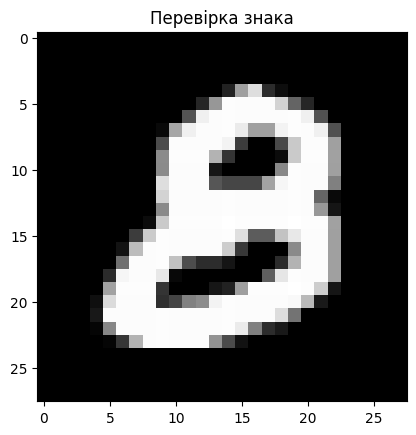

In [163]:
# 🧠 Тест пошуку певної цифри

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('signs/speed_sign_52.png', cv2.IMREAD_GRAYSCALE) #NENENENENENNENENENNENENEN
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Перевірка знака")
plt.show()
